<a href="https://colab.research.google.com/github/TimothyJan/Handwritten-Alphabet-Recognition-CNN/blob/main/Handwritten_Alphabet_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

The dataset for this project contains 372450 images of alphabets of 28×28, all present in the form of a CSV file: 
<a href='https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format?resource=download'>Handwritten Character Recognition Dataset</a>

In [2]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

<h1>Split data into images and their corresponding labels.</h1>

In [3]:
# removing 'o' column from the labels
X = data.drop('0',axis = 1)
y = data['0']

<h1>Reshape the data in csv file to be displayed as an image.</h1>

In [4]:
# Splitting data into training and testing datasets
# display images as 28x28pixels, originally 784 columns of pixel data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


<h1>Map Integer values with characters.</h1>

In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

<h1>Plot the number of alphabets in the dataset.</h1>

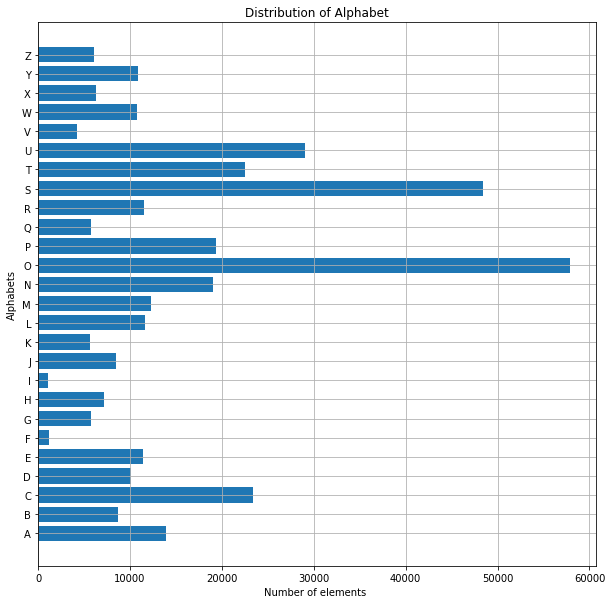

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.title('Distribution of Alphabet')
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

<h1>Shuffle the data.</h1>

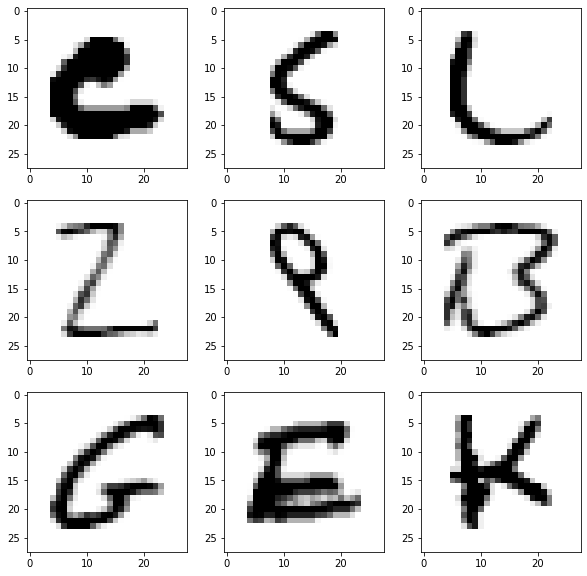

In [7]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

<h1>Reshape the training & test dataset to be put in model.</h1>
Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [8]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)
# Reshape the train & test image dataset so that they can be put in the model.
# New shape of train data:  (297960, 28, 28, 1)
# New shape of train data:  (74490, 28, 28, 1)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


<h1>Reshape the training and test dataset so that it can be put in the model.</h1>
The single float values are converted to categorical values. This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.

In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


<h3>CNN stands for Convolutional Neural Networks that are used to extract the features of the images using several layers of filters.</h3>
<ul>
  <li>The convolution layers are generally followed by maxpool layers that are used to reduce the number of features extracted and ultimately the output of the maxpool and layers and convolution layers are flattened into a vector of single dimension and are given as an input to the Dense layer (The fully connected network).</li>
</ul>

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

CNN model designed for training the model over the training dataset. We create a <code>Sequential</code> model.<br>
<code>Conv2D()</code>: 2D convolution layer (e.g. spatial convolution over images.) This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
<ul>
  <li><code>filters</code>: Integer, the dimensionality of the output space</li>
  <li><code>kernel_size</code>: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.</li>
  <li><code>activation</code>: Activation function to use</li>
  <li><code>padding</code>: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. </li>
</ul>
<br>
<code>MaxPooling2D()</code>: Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.
<ul>
  <li><code>pool_size</code>: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.</li>
  <li><code>strides</code>: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.</li>
</ul>

<code>flatten()</code>: flattens the input. Does not affect the batch size. 

<code>Dense()</code>: densely connected NN layer. Dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer.
<ul>
  <li><code>units</code>: Positive integer, dimensionality of the output space.</li>
  <li><code>activation</code>: Activation function to use.</li>
</ul>

> <b>Recall</b>: <code>tf.keras.activations.relu</code> activation applies the rectified linear unit activation function.

> <b>Recall</b>: <code>tf.keras.activations.softmax</code> is an activation that convert a vector of values to a probability distribution.<br>

<h1>Compiling and Fitting the Model<h1>
<h4>The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
The dataset is very large so we are training for only a single epoch, however, as required we can even train it for multiple epochs(which is recommended for character recognition for better accuracy).</h4>


In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 419s 45ms/step - loss: 0.1532 - accuracy: 0.9581 - val_loss: 0.0907 - val_accuracy: 0.9754


In [12]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

<h1>Getting the Train & Validation Accuracies & Losses.</h1>
Training & validation accuracies along with the training & validation losses for character recognition.

In [13]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9753926992416382]
The training accuracy is : [0.9581286311149597]
The validation loss is : [0.09073515981435776]
The training loss is : [0.1532047986984253]


<h1>Doing Some Predictions on Test Data</h1>
Create 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, that are made using the <code>model.predict()</code> function for text recognition.

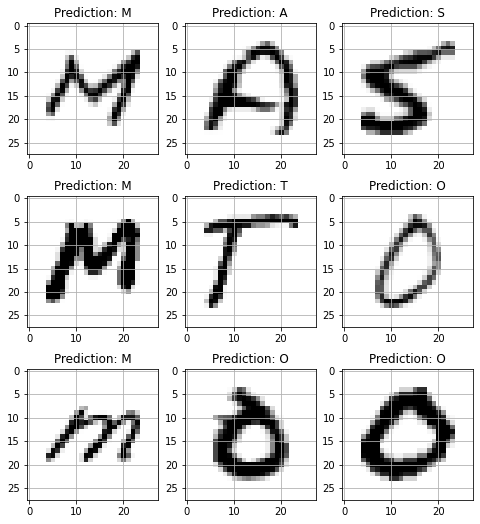

In [14]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

<h1>Doing Prediction on External Image</h1>
Read an external image and make a copy of it to go through some processing. The image read is then converted from BGR representation (as OpenCV reads the image in BGR format) to RGB for displaying the image, & is resized to our required dimensions that we want to display the image in.

In [19]:
# img = cv2.imread(r'img_b.jpg')
img = cv2.imread('img_b.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

AttributeError: ignored

We convert the image from BGR to grayscale and apply thresholding to it. We don’t need to apply a threshold we could use the grayscale to predict, but we do it to keep the image smooth without any sort of hazy gray colors in the image that could lead to wrong predictions.<br>
The image is to be then resized using <code>cv2.resize()</code> function into the dimensions that the model takes as input, along with reshaping the image using <code>np.reshape()</code> so that it can be used as model input.

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

Now we make a prediction using the processed image & use the <code>np.argmax()</code> function to get the index of the class with the highest predicted probability. Using this we get to know the exact character through the word_dict dictionary.<br>
This predicted character is then displayed on the frame.

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

Here we are setting up a waitKey in a while loop that will be stuck in loop until Esc is pressed, & when it gets out of loop using <code>cv2.destroyAllWindows()</code> we destroy any active windows created to stop displaying the frame.

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows(